In [5]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Упражнения


#### Посчитать ДИ уровня доверия 95% и 99% для следующих данных

In [20]:
data_x = np.array([84, 105, 98, 97, 108, 82, 99, 89, 93, 119, 
              99, 99, 97, 112, 100, 95, 114, 95, 116, 112])
mean = data_x.mean()
var = data_x.var()
se = (var / len(data_x))**0.5
print(mean-2*se)  #95% ДИ
print(mean+2*se)
print(mean-3*se)  #99% ДИ
print(mean+3*se)

96.17054690838268
105.12945309161734
93.93082036257402
107.36917963742599


In [13]:
# your solution is here

#### Проверить $H_0: M_{data_x} = M_{data_y}$ с помощью критерия Манна-Уитни

### Критерий Манна-Уитни

Пусть $n_1, n_2$ -- размер 1-й и второй выборок соответственно. $N = n_1 + n_2$
- объединим обе выборки и произведем ранжирование
- посчитаем сумму рангов для каждой выборки
- $T_x \text{наибольшая из них, соответствующая выборке } n_x$ 

$$U = n_1 \cdot n_2 + \frac{n_x(n_x + 1)}{2} - T_x$$

Рассматриваем $U$ как p-value

In [17]:
data_y = np.array([57, 57, 104, 95, 90, 71, 84, 60, 76, 102,
              69, 80, 69, 99, 76, 75, 56, 56, 69, 60])

In [28]:
# your solution is here
n1 = len(data_x)
n2 = len(data_y)
data = list(enumerate(sorted(list(data_x) + list(data_y))))
sum_x = sum_y = 0
for elem in data:
    if elem[1] in data_x:
        sum_x += elem[0]
    else:
        sum_y += elem[0]
#т.к. сумма Х больше, то
U = len(data_y)*len(data_x) + (len(data_x)*(len(data_x)+1))/2 - sum_x
U

2.0

In [ ]:
#проверяем на distribution calculator т.к. выборка маленькая - 20 элементов

In [29]:
# загружаем датасет Бостон
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля LSTAT

In [45]:
# your solution is here
from math import sqrt
mean = sum(df['LSTAT']) / len(df['LSTAT'])
print(mean)
print(sqrt(sum([(i-mean)**2 for i in df['LSTAT']]) / (len(df['LSTAT']) - 1)))
ranks = sorted(df['LSTAT'])
n = len(df['LSTAT'])
mu = (ranks[n//2 - 1] +ranks[n//2]) / 2
print(mu)

12.653063241106723
7.141061511348571
11.36


In [34]:
df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

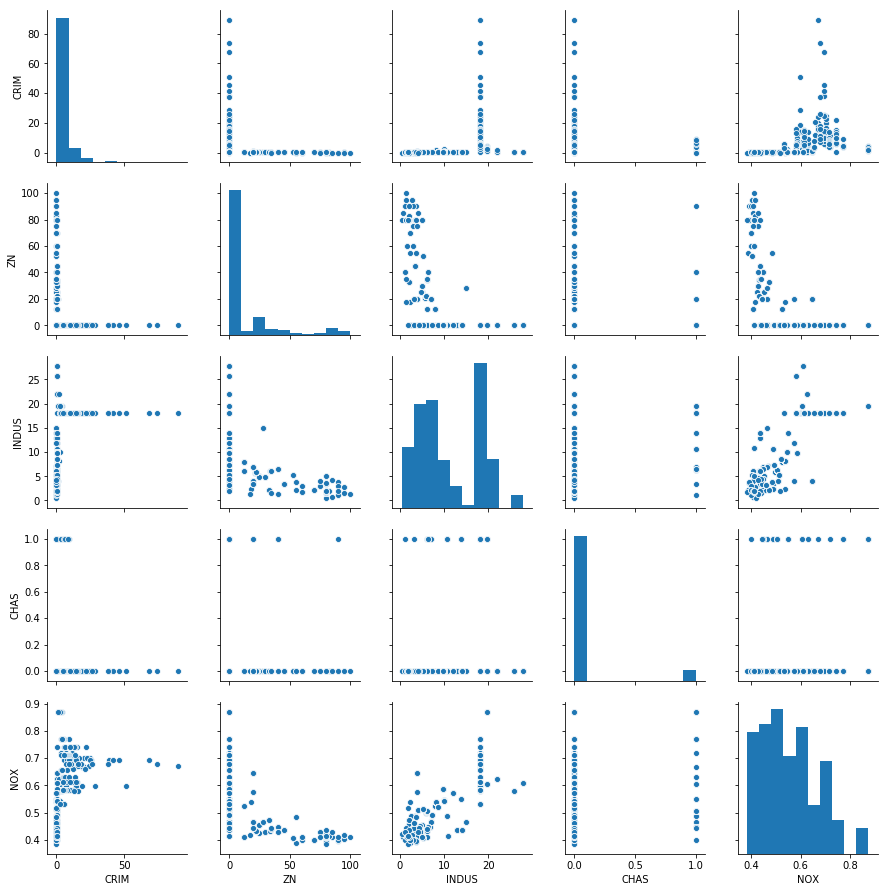

In [49]:
# your solution is here
sns.pairplot(df.iloc[:,:5]) #, vars = ['CRIM', 'ZN']

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [53]:
# your solution is here
df.iloc[:,-5:].corr()

,RAD,TAX,PTRATIO,B,LSTAT
RAD,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.910228,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.464741,0.460853,1.000000,-0.177383,0.374044
B,-0.444413,-0.441808,-0.177383,1.000000,-0.366087
LSTAT,0.488676,0.543993,0.374044,-0.366087,1.000000


#### Проверить найденные пары t-тестом

In [54]:
# your solution is here
stats.ttest_ind(df['RAD'], df['TAX'])

Ttest_indResult(statistic=-53.14149450259023, pvalue=7.995324482613846e-295)

#### Проверить руками гипотезу $H_0: M_{AGE} = 75$ 

In [9]:
# your solution is here

#### Нарисовать распределение признака TAX с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

In [11]:
# your solution is here

#### Применить критерий Пирсона

Есть данные о продаже литров молока в магазине по дня недели 

ПН – 36, ВТ – 53, СР – 35, ЧТ – 26, ПТ – 30, СБ – 44, ВС – 28.


Статистика **хи-квадрат**: 
$$\hat \chi = \sum_{j=1}^{m} \dfrac{(\mu_j - np_j^0)^2}{np_j^0},$$


где $\mu_j = \displaystyle \sum_{i=1}^{n} I\{X_i = a_j\}$ --- число выпадений $j-$го исхода$

In [3]:
# your solution is here
p = 1/7

mu = [36,53,35,26,30,44,28]
n = sum(mu)
xi = sum([((mu[i] - n*p)**2) / (n*p) for i in range(len(mu))])
print (xi)

15.388888888888893
